In [2]:
# !pip install -r requirements.txt

In [3]:
import laspy
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d


In [4]:
las_file = "data/1 stockpile 19-13-2025_group1_densified_point_cloud.las"
las = laspy.read(las_file)

In [5]:
def extract_las_metadata(las):
    # Extract header information
    print("\n=== LAS File Metadata ===")
    print(f"Point count: {las.header.point_count}")
    print(f"Version: {las.header.version}")
    print(f"Point format: {las.header.point_format}")


    # Units and coordinate system information
    print("\n=== Coordinate System Information ===")
    print(f"Scale factors (x,y,z): {las.header.scales}")
    print(f"Offsets (x,y,z): {las.header.offsets}")
    # The units in LAS files are typically meters, but can be feet in some cases
    # The scale factor helps determine the precision of the coordinates
    print(f"Coordinate units: {'Meters' if las.header.scales[0] < 0.01 else 'Feet'} (estimated based on scale factor)")


    # Spatial extent
    print("\n=== Spatial Extent ===")
    print(f"X range: {las.header.x_min:.2f} to {las.header.x_max:.2f}")
    print(f"Y range: {las.header.y_min:.2f} to {las.header.y_max:.2f}")
    print(f"Z range: {las.header.z_min:.2f} to {las.header.z_max:.2f}")
    # The units in LAS files are typically meters, but can be feet in some cases
    # The scale factor helps determine the precision of the coordinates
    print(f"Coordinate units: {'Meters' if las.header.scales[0] < 0.01 else 'Feet'} (estimated based on scale factor)")

    # Available point attributes
    print("\n=== Available Point Attributes ===")
    print("Point dimensions:", list(las.point_format.dimension_names))

    # Point data statistics
    print("\n=== Point Data Statistics ===")
    if hasattr(las, 'classification'):
        unique_classes = np.unique(las.classification)
        print("Classifications found:", unique_classes)
        for cls in unique_classes:
            count = np.sum(las.classification == cls)
            print(f"Class {cls}: {count} points")

    if hasattr(las, 'intensity'):
        print(f"\nIntensity range: {np.min(las.intensity)} to {np.max(las.intensity)}")

    return las

In [6]:
extract_las_metadata(las)


=== LAS File Metadata ===
Point count: 5973984
Version: 1.2
Point format: <PointFormat(3, 0 bytes of extra dims)>

=== Coordinate System Information ===
Scale factors (x,y,z): [0.001 0.001 0.001]
Offsets (x,y,z): [ 375000. 6309000.       0.]
Coordinate units: Meters (estimated based on scale factor)

=== Spatial Extent ===
X range: 375140.58 to 375276.53
Y range: 6309471.52 to 6309642.49
Z range: 75.72 to 90.27
Coordinate units: Meters (estimated based on scale factor)

=== Available Point Attributes ===
Point dimensions: ['X', 'Y', 'Z', 'intensity', 'return_number', 'number_of_returns', 'scan_direction_flag', 'edge_of_flight_line', 'classification', 'synthetic', 'key_point', 'withheld', 'scan_angle_rank', 'user_data', 'point_source_id', 'gps_time', 'red', 'green', 'blue']

=== Point Data Statistics ===
Classifications found: [1]
Class 1: 5973984 points

Intensity range: 0 to 0


<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 5973984 points, 3 vlrs)>

In [1]:
def visualize_las_file(las):

    # Extract points
    points = np.vstack((las.x, las.y, las.z)).transpose()

    # Create Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)

    # Visualize
    o3d.visualization.draw_geometries([pcd])

In [8]:
# visualize_las_file(las)

2025-04-12 16:58:27.624 Python[99322:3101828] +[IMKClient subclass]: chose IMKClient_Legacy
2025-04-12 16:58:27.624 Python[99322:3101828] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


In [9]:
def detect_ground_plane(pcd, distance_threshold=0.1, ransac_n=3, num_iterations=1000):
    """
    Detect the ground plane using RANSAC
    Returns the ground plane model and inlier indices
    """
    plane_model, inliers = pcd.segment_plane(distance_threshold=distance_threshold,
                                            ransac_n=ransac_n,
                                            num_iterations=num_iterations)
    return plane_model, inliers

def remove_ground_plane(file_path, distance_threshold=0.5):
    """
    Remove the ground plane from the point cloud
    """
    # Read LAS file
    las = laspy.read(file_path)

    # Extract points
    points = np.vstack((las.x, las.y, las.z)).transpose()

    # Create Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)

    # Detect ground plane
    plane_model, inliers = detect_ground_plane(pcd, distance_threshold)

    # Get non-ground points
    non_ground = pcd.select_by_index(inliers, invert=True)

    # Get ground points
    ground = pcd.select_by_index(inliers)

    # Print ground plane information
    print("\n=== Ground Plane Information ===")
    print(f"Plane equation: {plane_model[0]:.2f}x + {plane_model[1]:.2f}y + {plane_model[2]:.2f}z + {plane_model[3]:.2f} = 0")
    print(f"Number of ground points: {len(inliers)}")
    print(f"Number of non-ground points: {len(points) - len(inliers)}")

    return non_ground, ground

In [10]:
def visualize_las_file(file_path):
    # Read LAS file
    las = laspy.read(file_path)

    # Extract points
    points = np.vstack((las.x, las.y, las.z)).transpose()

    # Create Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)

    # Visualize
    o3d.visualization.draw_geometries([pcd])



In [11]:
las_data.x.shape

NameError: name 'las_data' is not defined

: 

In [35]:
non_ground.RGBDImage

<Type.RGBDImage: 9>


=== Ground Plane Information ===
Plane equation: -0.03x + -0.02y + 1.00z + 145492.54 = 0
Number of ground points: 3009958
Number of non-ground points: 2964026


TypeError: Image data of dtype object cannot be converted to float

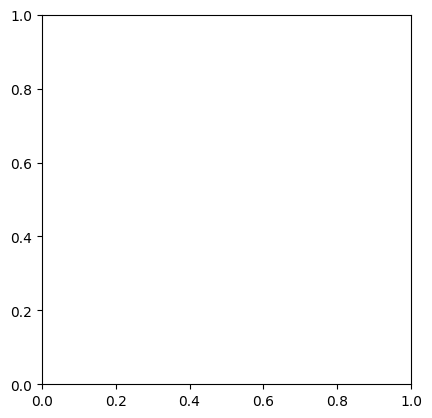

In [ ]:
las_file = "data/1 stockpile 19-13-2025_group1_densified_point_cloud.las"
las = laspy.read(las_file)

ground, non_ground = remove_ground_plane(las_file)

#plot the non_ground rgb image
plt.imshow(non_ground.RGBDImage)
plt.show()